In [22]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [4]:
otodf = pd.read_csv('/Users/polinabezukladnova/Downloads/Otodom_Flat_Listings.csv')

In [5]:
otodf.head()

,Title,Price,Location,Surface,Number_of_Rooms,Floor,Finishing_Condition,Heating,Parking_Space,Balcony_Garden_Terrace,Link,Voivodeship,City
0,2 pokoje 47m2 po remoncie + garderoba + balkon,415000.0,"ul. Marysińska, Stare Bałuty, Bałuty, Łódź, łó...",47.0,2,NaN,do zamieszkania,miejskie,garaż/miejsce parkingowe,balkon,https://www.otodom.pl/pl/oferta/2-pokoje-47m2-...,Łódzkie,Łódź
1,Właściciel- Ludwiki DD - WIDOK NA ZIELEŃ - 2x gar,2499000.0,"ul. Ludwiki, Czyste, Wola, Warszawa, mazowieckie",105.0,4,2/8,do wykończenia,miejskie,garaż/miejsce parkingowe,balkon,https://www.otodom.pl/pl/oferta/wlasciciel-lud...,Mazowieckie,Warszawa
2,"Sprzedam mieszkanie 60m2, 2 balkony, garderoba",649000.0,"ul. Londyńska, Gorzów Wielkopolski, lubuskie",60.0,3,4/4,do zamieszkania,miejskie,NaN,"balkon, taras",https://www.otodom.pl/pl/oferta/sprzedam-miesz...,Lubuskie,Gorzów Wielkopolski
3,"Wyjątkowy, duży apartament z antresolą",2108000.0,"Mrzeżyno, Trzebiatów, gryficki, zachodniopomor...",78.3,3,4/4,do wykończenia,NaN,garaż/miejsce parkingowe,NaN,https://www.otodom.pl/pl/oferta/wyjatkowy-duzy...,Zachodniopomorskie,gryficki
4,"2/3-pok. 49,2 m2 w samym sercu Koszalina - Kuncer",450180.0,"ul. Bartosza Głowackiego, Koszalin, zachodniop...",49.2,2,2/3,do zamieszkania,miejskie,garaż/miejsce parkingowe,balkon,https://www.otodom.pl/pl/oferta/2-3-pok-49-2-m...,Zachodniopomorskie,Koszalin


In [7]:
otodf.isna().sum()

Title                        0
Price                      143
Location                     1
Surface                      0
Number_of_Rooms              0
Floor                       64
Finishing_Condition        578
Heating                    747
Parking_Space             1329
Balcony_Garden_Terrace     705
Link                         0
Voivodeship                  1
City                         1
dtype: int64

In [8]:
otodf_1 = otodf[['Surface', 'Price']]
otodf_1 = otodf_1.dropna()
otodf_1

,Surface,Price
0,47.00,415000.0
1,105.00,2499000.0
2,60.00,649000.0
3,78.30,2108000.0
4,49.20,450180.0
...,...,...
2802,34.00,525000.0
2803,61.18,829000.0
2804,50.00,830000.0
2805,66.47,699000.0


<Axes: >

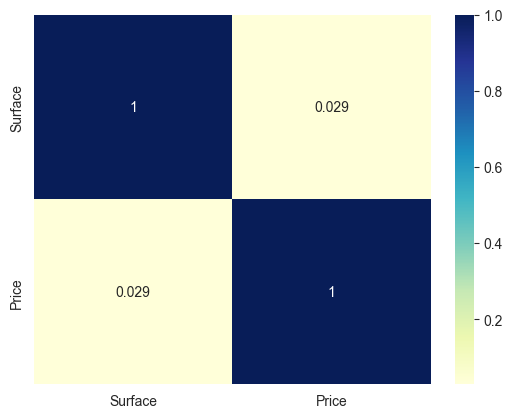

In [9]:
corr = otodf_1.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')

In [10]:
pd.options.display.float_format = '{:.3f}'.format
otodf_1.describe()

,Surface,Price
count,2664.000,2664.000
mean,61.561,1568792.503
std,84.643,7945282.597
min,1.000,44444.000
25%,43.000,395000.000
50%,54.400,573000.000
75%,69.000,780000.000
max,3800.000,162499380.000


In [11]:
q1 = np.percentile(otodf_1['Surface'], 25)
q3 = np.percentile(otodf_1['Surface'], 75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(f'Q1: {q1}', f'Q3: {q3}', f'IQR: {iqr}', f'Lower outlier threshold: {lower}', f'Upper outlier threshold: {upper}', sep='\n')

Q1: 43.0
Q3: 69.0
IQR: 26.0
Lower outlier threshold: 4.0
Upper outlier threshold: 108.0


In [12]:
X = otodf_1['Surface']
y = otodf_1['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
lin_reg1 = LinearRegression()

lin_reg1.fit(X_train.values.reshape(-1,1), y_train)

predictions1 = lin_reg1.predict(X_test.values.reshape(-1,1))

print("Punkt przecięcia:", lin_reg1.intercept_)
print("Współczynniki:", lin_reg1.coef_)
print('Średni błąd bezwzględny (MAE):', mean_absolute_error(y_test, predictions1))
print("Błąd średniokwadratowy (MSE):", mean_squared_error(y_test, predictions1))
print("Pierw. błędu średniokwadratowego (RMSE):", np.sqrt(mean_squared_error(y_test, predictions1)))
print("Współczynnik determinacji R-kwadrat:", r2_score(y_test, predictions1))

Punkt przecięcia: 1393959.888424575
Współczynniki: [2375.36188693]
Średni błąd bezwzględny (MAE): 1875141.1343519343
Błąd średniokwadratowy (MSE): 81450569367726.75
Pierw. błędu średniokwadratowego (RMSE): 9024996.917879073
Współczynnik determinacji R-kwadrat: 0.0004911898590828079


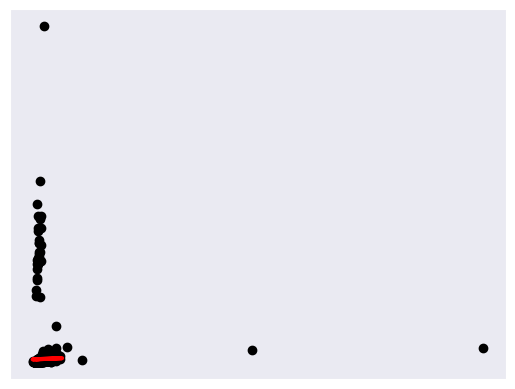

In [14]:
plt.scatter(X_train, y_train, color="black")
plt.plot(X_test, predictions1, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [15]:
q1 = np.percentile(X_train, 25)
q3 = np.percentile(X_train, 75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

sum((X_train > upper) | (X_train < lower))

105

In [16]:
outliers_map = ((X_train > upper) | (X_train < lower))

outliers_map = outliers_map
X_train = X_train[~outliers_map]
y_train = y_train[~outliers_map]

<Axes: ylabel='Surface'>

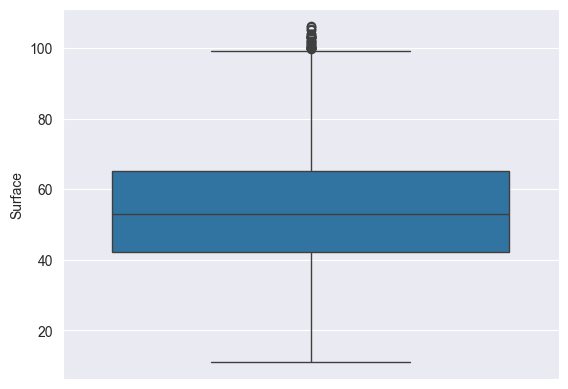

In [17]:
sns.boxplot(X_train)

In [19]:
lin_reg2 = LinearRegression()

lin_reg2.fit(X_train.values.reshape(-1,1), y_train)

predictions2 = lin_reg2.predict(X_test.values.reshape(-1,1))

print("Punkt przecięcia:", lin_reg2.intercept_)
print("Współczynniki:", lin_reg2.coef_)
print('Średni błąd bezwzględny (MAE):', mean_absolute_error(y_test, predictions2))
print("Błąd średniokwadratowy (MSE):", mean_squared_error(y_test, predictions2))
print("Pierw. błędu średniokwadratowego (RMSE):", np.sqrt(mean_squared_error(y_test, predictions2)))
print("Współczynnik determinacji R-kwadrat:", r2_score(y_test, predictions2))

Punkt przecięcia: 541985.1059085284
Współczynniki: [17715.3771551]
Średni błąd bezwzględny (MAE): 1909086.9839112042
Błąd średniokwadratowy (MSE): 81282213913544.39
Pierw. błędu średniokwadratowego (RMSE): 9015664.917993814
Współczynnik determinacji R-kwadrat: 0.0025571393177151736


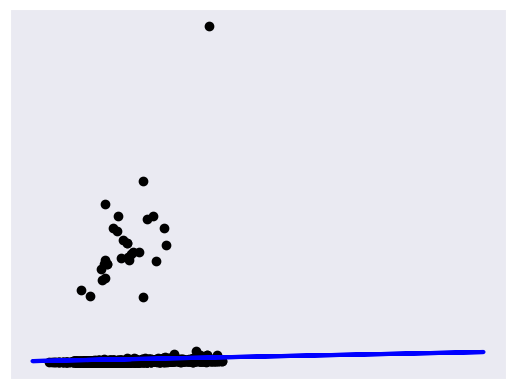

In [20]:
plt.scatter(X_train, y_train, color="black")
plt.plot(X_test, predictions2, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Zadanie 1

Bazując na przykładzie z wykładu stwórz model regresji wielomianowej dla dwóch stworzonych tutaj modeli regresji liniowej. Porównaj wyniki.

In [23]:
X1_train = X_train.values.reshape(-1,1)
X1_test = X_test.values.reshape(-1,1)
y1_train = y_train

X2_train = X_train[~outliers_map].values.reshape(-1,1)
X2_test = X_test.values.reshape(-1,1)
y2_train = y_train[~outliers_map]

poly_reg1 = make_pipeline(
    PolynomialFeatures(degree=6),
    LinearRegression()
)
poly_reg1.fit(X1_train, y1_train)
predictions1_poly = poly_reg1.predict(X1_test)

poly_reg2 = make_pipeline(
    PolynomialFeatures(degree=6),
    LinearRegression()
)
poly_reg2.fit(X2_train, y2_train)
predictions2_poly = poly_reg2.predict(X2_test)

print("\nModel 1 (with outliers) - Polynomial Regression:")
print('MAE:', mean_absolute_error(y_test, predictions1_poly))
print('MSE:', mean_squared_error(y_test, predictions1_poly))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions1_poly)))
print('R2:', r2_score(y_test, predictions1_poly))

print("\nModel 2 (without outliers) - Polynomial Regression:")
print('MAE:', mean_absolute_error(y_test, predictions2_poly))
print('MSE:', mean_squared_error(y_test, predictions2_poly))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions2_poly)))
print('R2:', r2_score(y_test, predictions2_poly))


Model 1 (with outliers) - Polynomial Regression:
MAE: 67092742.965934664
MSE: 1.0600505082102533e+18
RMSE: 1029587542.7617863
R2: -13007.255563776618

Model 2 (without outliers) - Polynomial Regression:
MAE: 67092742.965934664
MSE: 1.0600505082102533e+18
RMSE: 1029587542.7617863
R2: -13007.255563776618


Zadanie 2

Dodaj do zbioru danych cechę Number of rooms i sprawdź jak to wpływa na jakość modelu.

In [24]:
otodf_2 = otodf[['Surface', 'Price', 'Number_of_Rooms']].dropna()
otodf_2['Number_of_Rooms'] = otodf_2['Number_of_Rooms'].replace('więcej niż 10', 11)
otodf_2['Number_of_Rooms'] = pd.to_numeric(otodf_2['Number_of_Rooms'], errors='coerce')
otodf_2 = otodf_2.dropna()

In [25]:
X = otodf_2[['Surface', 'Number_of_Rooms']]
y = otodf_2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R²:", r2_score(y_test, pred))

MAE: 1864467.683977827
MSE: 81187039966881.58
RMSE: 9010385.117567483
R²: 0.0037250525554469727


Zadanie 3

Zakoduj cechę Voivoideship (one-hot, dummy ?) i wykorzystaj w zbiorze danych i ponownie sprawdź jaki to ma wpływ na model.

In [26]:
otodf_3 = otodf[['Surface', 'Number_of_Rooms', 'Voivodeship', 'Price']].dropna()

otodf_3['Number_of_Rooms'] = otodf_3['Number_of_Rooms'].replace('więcej niż 10', 11)
otodf_3['Number_of_Rooms'] = pd.to_numeric(otodf_3['Number_of_Rooms'], errors='coerce')
otodf_3 = otodf_3.dropna()

voiv_dummies = pd.get_dummies(otodf_3['Voivodeship'], prefix='Voiv')

otodf_3 = pd.concat([otodf_3.drop(columns=['Voivodeship']), voiv_dummies], axis=1)

X = otodf_3.drop(columns=['Price'])
y = otodf_3['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R²:", r2_score(y_test, pred))

MAE: 1991411.468385511
MSE: 94627752420374.02
RMSE: 9727679.70383349
R²: -5.774701619132294e-05


Zadanie 4 *

Dodaj kolejne cechy modelu zastanawiając się nad poprawnym ich zakodowaniem, tak aby poprawić jego jakość.

* zadanie opcjonalne (może być brane pod uwagę w przypadku wątpliwości co do finalnej oceny).

In [27]:
otodf_4 = otodf[['Floor', 'Surface', 'Price', 'Number_of_Rooms', 'Voivodeship']].dropna()

otodf_4['Number_of_Rooms'] = otodf_4['Number_of_Rooms'].replace('więcej niż 10', 11)
otodf_4['Number_of_Rooms'] = pd.to_numeric(otodf_4['Number_of_Rooms'], errors='coerce')
otodf_4 = otodf_4.dropna()

otodf_4 = otodf_4[otodf_4['Floor'].str.contains(r'^\d+/\d+$')]

otodf_4[['Floor_number', 'Total_floors']] = otodf_4['Floor'].str.split('/', expand=True).astype(int)

voiv_dummies = pd.get_dummies(otodf_4['Voivodeship'], prefix='Voiv')

X = pd.concat([
    otodf_4[['Surface', 'Number_of_Rooms', 'Floor_number', 'Total_floors']],
    voiv_dummies
], axis=1)

y = otodf_4['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R²:", r2_score(y_test, pred))

MAE: 2173663.9039087403
MSE: 114538841959696.67
RMSE: 10702282.09120357
R²: 0.006142805909760685
